# **Understanding the Dataset**

This dataset contains tweets with associated sentiment analysis metrics. The data can be used for text mining, natural language processing (NLP), and sentiment analysis projects. The tweets are categorized based on their subjectivity and polarity, allowing for insights into the opinions expressed in relation to various topics or targets. This dataset is particularly valuable for understanding public sentiment on different entities or issues.

Text Column: The dataset contains a column named Tweet that holds the text data.

Sentiment Labels: The dataset includes a Target column, which provides labeled sentiments (Positive, Neutral, Negative).

Since the dataset has sentiment labels, this task will be supervised sentiment analysis, where we validate or predict sentiments using the Tweet text and compare them with the Target labels.

# **Load the Dataset**

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/AstraZeneca Vaccine.csv')  # Or .xlsx, etc.
print(df.head())  # Preview the dataset
print(df.info())  # Check the structure of the dataset

   id                                              Tweet  Subjectivity  \
0   0  Respiratory syncytial virus, or RSV, is a comm...           0.5   
1   1  As pioneers in asthma, we continue to push the...           0.0   
2   2  It takes innovation to transform healthcare ex...           0.0   
3   3  Every day billions of people are trying to bal...           0.0   
4   4  An estimated 37 million people live with chron...           0.5   

   Polarity    Target  
0 -0.300000  Negative  
1  0.000000   Neutral  
2  0.000000   Neutral  
3  0.000000   Neutral  
4  0.136364  Positive  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553 entries, 0 to 1552
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1553 non-null   int64  
 1   Tweet         1553 non-null   object 
 2   Subjectivity  1552 non-null   float64
 3   Polarity      1552 non-null   float64
 4   Target        1552 non-null   object 
dtyp

# **Pre-Process the Dataset**

In [4]:
import pandas as pd
import re

# Load the dataset
file_path = '/content/AstraZeneca Vaccine.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Remove missing values
cleaned_data = data.dropna()

# Define a simplified preprocessing function
def simplified_preprocess_text(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # Remove punctuation, numbers, and special characters
    text = re.sub(r"[^a-zA-Z\s]", '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove common stop words
    common_stop_words = ['the', 'and', 'is', 'to', 'in', 'for', 'on', 'at', 'a', 'an', 'of', 'with', 'by', 'this', 'it', 'as']
    words = text.split()
    words = [word for word in words if word not in common_stop_words]
    # Join back into a single string
    return ' '.join(words)

# Apply the simplified preprocessing to the Tweet column
cleaned_data['Cleaned_Tweet'] = cleaned_data['Tweet'].apply(simplified_preprocess_text)

# Display the first few rows of the preprocessed data
print(cleaned_data[['Tweet', 'Cleaned_Tweet']].head())

                                               Tweet  \
0  Respiratory syncytial virus, or RSV, is a comm...   
1  As pioneers in asthma, we continue to push the...   
2  It takes innovation to transform healthcare ex...   
3  Every day billions of people are trying to bal...   
4  An estimated 37 million people live with chron...   

                                       Cleaned_Tweet  
0  respiratory syncytial virus or rsv common resp...  
1  pioneers asthma we continue push boundaries sc...  
2  takes innovation transform healthcare experien...  
3  every day billions people are trying balance l...  
4  estimated million people live chronic kidneydi...  


<ipython-input-4-209671698100>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Cleaned_Tweet'] = cleaned_data['Tweet'].apply(simplified_preprocess_text)


# **Building the Model**

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features for efficiency
X = tfidf_vectorizer.fit_transform(cleaned_data['Cleaned_Tweet'])

# Target variable
y = cleaned_data['Target']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a Logistic Regression classifier
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
accuracy, classification_rep

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.7041800643086816,
 '              precision    recall  f1-score   support\n\n    Negative       0.00      0.00      0.00        27\n     Neutral       0.69      0.75      0.72       136\n    Positive       0.72      0.79      0.75       148\n\n    accuracy                           0.70       311\n   macro avg       0.47      0.51      0.49       311\nweighted avg       0.64      0.70      0.67       311\n')

# **Results of the Model**

1. **Accuracy:-** The model achieved an accuracy of approximately 70.4%.

2. **Classification Report**
  *   **Negative Sentiment:** The model failed to predict any samples as Negative, resulting in a precision and recall of 0. This indicates an imbalance or insufficient representation in the training data.
  *   **Neutral Sentiment:**
    * Precision: 69%
    * Recall: 75%
    * F1-score: 72%
  * **Positive Sentiment:**
    * Precision: 72%
    * Recall: 79%
    * F1-score: 75%

The macro average F1-score is lower due to the model's poor performance on the Negative sentiment class.




# **Data Visualisation**

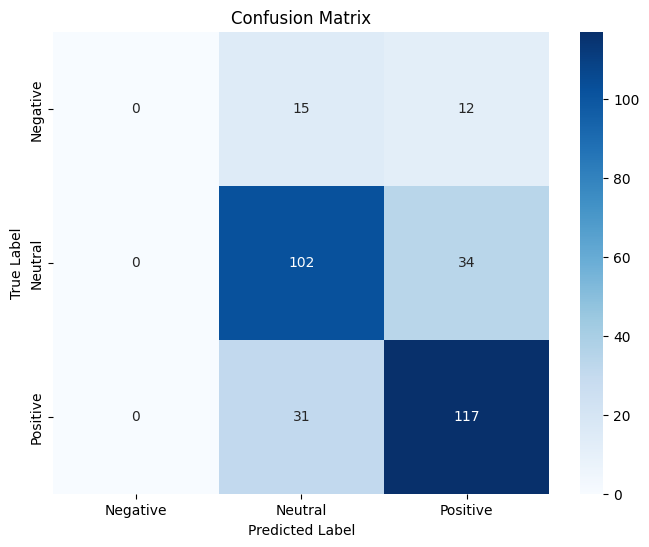

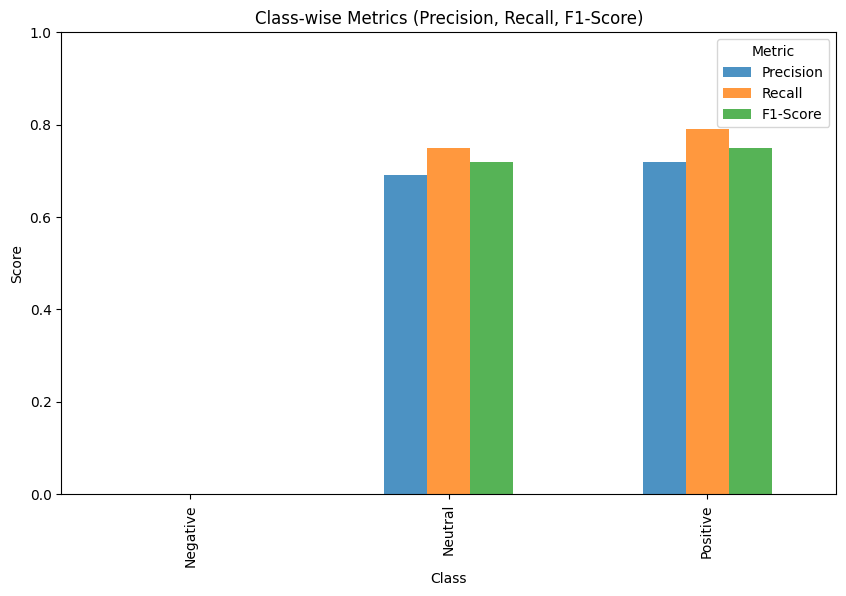

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=['Negative', 'Neutral', 'Positive'])

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Visualize class-wise precision, recall, and F1-score
metrics_df = pd.DataFrame.from_dict({
    'Metric': ['Precision', 'Recall', 'F1-Score'],
    'Negative': [0, 0, 0],  # From classification report (values were 0)
    'Neutral': [0.69, 0.75, 0.72],
    'Positive': [0.72, 0.79, 0.75]
})

metrics_df.set_index('Metric', inplace=True)
metrics_df.T.plot(kind='bar', figsize=(10, 6), alpha=0.8)
plt.title('Class-wise Metrics (Precision, Recall, F1-Score)')
plt.xlabel('Class')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(title='Metric')
plt.show()

# **Data Visualization Results**

**Confusion Matrix:**
*   Shows the counts of correct and incorrect predictions for each
sentiment class.
*   Highlights the model's difficulty in predicting Negative sentiments, as no predictions were made in that class.

**Class-wise Metrics Bar Chart:**
*   Visualizes Precision, Recall, and F1-Score for each class (Negative, Neutral, Positive).
*   Confirms the strong performance for Neutral and Positive classes, with Negative showing no measurable performance.